In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

In [91]:
def h(m, d, l, w):
    height=(6*m)/(np.pi*d*l*w)
    return height

In [92]:
def ellipse_volume(a,b,c):
    V=4/3*np.pi*a*b*c
    return V

def ellipse_c(a,b,V):
    c=V/(4/3*np.pi*a*b)
    return c

In [93]:
def dBsc_to_linear_meter_squared(dBsc_number):
    linear_square_centimeter=10**(dBsc_number/10)
    linear_square_meter=linear_square_centimeter*0.0001
    return linear_square_meter

In [94]:
def dBsm_to_linear_meter_squared(dBsm_number):
    linear_square_meter=10**(dBsm_number/10)
    return linear_square_meter

In [95]:
def dBsm_to_dBsc(dBsm_number):
    linear_square_meter=dBsm_to_linear_meter_squared(dBsm_number)
    linear_square_centimeter=linear_square_meter*10000
    dBsc=10*np.log10(linear_square_centimeter)
    return dBsc

In [96]:
def linear_meter_squared_to_dBsc(linear_meter_squared_number):
    linear_square_centimeter=linear_meter_squared*10000
    dBsc=10*np.log10(linear_square_centimeter)
    return dBsc

In [97]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [98]:
def wipl_radiation_output_input_reader_ellipsoid(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
    
    iwp_file=path_to_file[0:-3]+'IWP'
    iwp_df=pd.read_csv(iwp_file, sep=' ', nrows=6, skipinitialspace=True,
                      names=['1','2','3','4','5','6','7'])
    number_of_domains=float(iwp_df['5'][3])
    if number_of_domains==3:
        iwp_df=pd.read_csv(iwp_file, sep=' ', nrows=7, skipinitialspace=True,
                      names=['1','2','3','4','5','6','7'])
        domain_3_real=float(iwp_df['1'][6])
        domain_3_imag=float(iwp_df['2'][6])
    
    else:
        domain_3_real=np.nan
        domain_3_imag=np.nan
    
    domain_1_real=float(iwp_df['1'][4])
    domain_1_imag=float(iwp_df['2'][4])
    
    domain_2_real=float(iwp_df['1'][5])
    domain_2_imag=float(iwp_df['2'][5])


    freq=float(iwp_df['2'][2])
    points=float(iwp_df['1'][3])
    elements=float(iwp_df['3'][3])
    
    
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'Ellipsoid' : path_to_file.split('/')[-1].split('_')[0],
                  'BugType' : path_to_file.split('/')[-1].split('_')[1], 
                  'Specimen_Number' : int(path_to_file.split('/')[-1].split('_')[2]),
                  'BodyType' : path_to_file.split('/')[-1].split('_')[3],
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Internal Domain' : path_to_file.split('/')[-1].split('_')[6],
                  'Number of Plates' : int(path_to_file.split('/')[-1].split('_')[7].split('.')[0]),
                  'ShellDomain' : 'NA',
                  'Frequency' : freq,
                  'Points' : points,
                  'Elements' : elements,
                  'Domain 1 Real': domain_1_real,
                  'Domain 1 Imag': domain_1_imag,
                  'Domain 2 Real': domain_2_real,
                  'Domain 2 Imag': domain_2_imag,
                  'Domain 3 Real': domain_3_real,
                  'Domain 3 Imag': domain_3_imag
                 },
        
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'EllipsoidShell' : path_to_file.split('/')[-1].split('_')[0],
                  'BugType' : path_to_file.split('/')[-1].split('_')[1], 
                  'Specimen_Number' : int(path_to_file.split('/')[-1].split('_')[2]),
                  'BodyType' : path_to_file.split('/')[-1].split('_')[3],
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Internal Domain' : path_to_file.split('/')[-1].split('_')[6],
                  'Number of Plates' : int(path_to_file.split('/')[-1].split('_')[7]),
                  'ShellDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0],
                  'Frequency' : freq,
                  'Points' : points,
                  'Elements' : elements,
                  'Domain 1 Real': domain_1_real,
                  'Domain 1 Imag': domain_1_imag,
                  'Domain 2 Real': domain_2_real,
                  'Domain 2 Imag': domain_2_imag,
                  'Domain 3 Real': domain_3_real,
                  'Domain 3 Imag': domain_3_imag
                 },
    
    return ra1_df, ra1_dict

### Plate Test

In [101]:
data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Ellipsoids/Plate_Tests_MIrkLBG/'
ellipsoid_files=glob(data_dir+'*.ra1')
ellipsoid_files.sort()



ellipsoid_radiation_data=[]
ellipsoid_radiation_metadata=[]
for f in ellipsoid_files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ellipsoid_ra1_df, ellipsoid_ra1_dict)= wipl_radiation_output_input_reader_ellipsoid(f)
    ellipsoid_radiation_data.append(ellipsoid_ra1_df)
    ellipsoid_radiation_metadata.append(ellipsoid_ra1_dict)  


Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_01
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_02
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_03
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_04
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_05
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_06
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_07
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_08
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_09
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_10
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_11
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_12
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_13
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_14
Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_15
Ellipsoid_

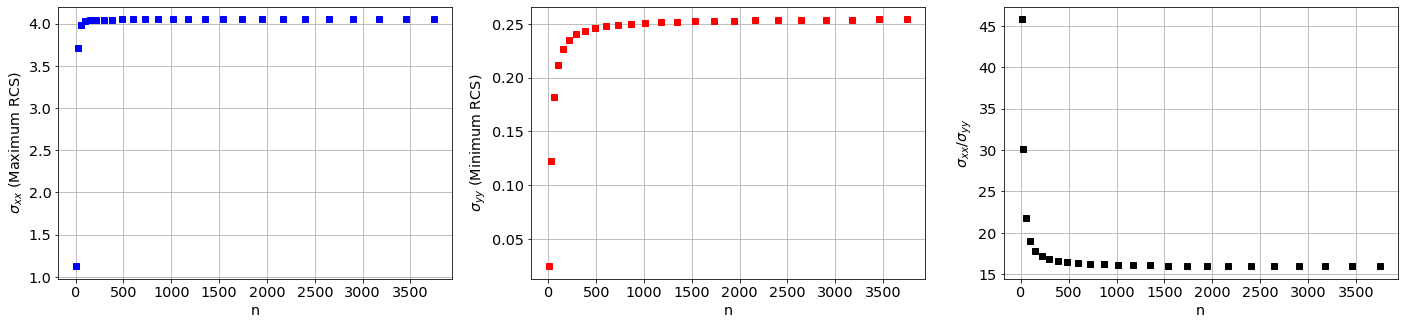

In [102]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(ellipsoid_radiation_data):
    r=ellipsoid_radiation_data[idx]['RCS'].loc[ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(ellipsoid_radiation_metadata[idx][0]['Elements'])

fig, axs = plt.subplots(1, 3, figsize=[24,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].plot(n, max_r, 'bs')
axs[0].grid(True)
#axs[0].set_ylim([2.5,2.8])
#axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS)' )
axs[0].set(xlabel='n')

axs[1].plot(n, min_r, 'rs')
axs[1].grid(True)
#axs[1].set_ylim([0.16, 0.24])
#axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS)')
axs[1].set(xlabel='n')

axs[2].plot(n, max_min_r, 'ks' )
axs[2].grid(True)
#axs[2].set_ylim([11.5, 15])
#axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='n')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#from matplotlib.ticker import FormatStrFormatter

#for i in axs:
#    i.set_xticks([0.5, 1,10, 100])
#    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure5.svg', format='svg', dpi=1200)



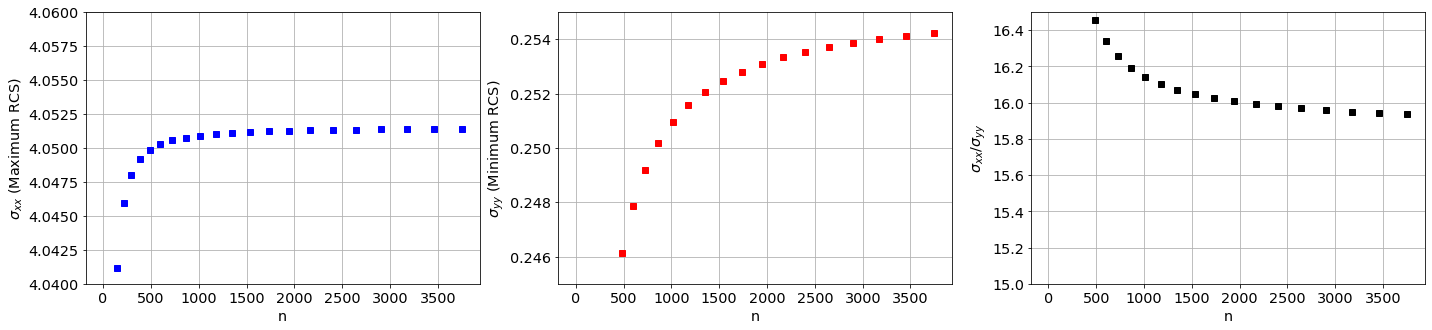

In [103]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(ellipsoid_radiation_data):
    r=ellipsoid_radiation_data[idx]['RCS'].loc[ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(ellipsoid_radiation_metadata[idx][0]['Elements'])

fig, axs = plt.subplots(1, 3, figsize=[24,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].plot(n, max_r, 'bs')
axs[0].grid(True)
axs[0].set_ylim([4.04,4.06])
#axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS)' )
axs[0].set(xlabel='n')

axs[1].plot(n, min_r, 'rs')
axs[1].grid(True)
axs[1].set_ylim([0.245, 0.255])
#axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS)')
axs[1].set(xlabel='n')

axs[2].plot(n, max_min_r, 'ks' )
axs[2].grid(True)
axs[2].set_ylim([15, 16.5])
#axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='n')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#from matplotlib.ticker import FormatStrFormatter

#for i in axs:
#    i.set_xticks([0.5, 1,10, 100])
#    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure5.svg', format='svg', dpi=1200)



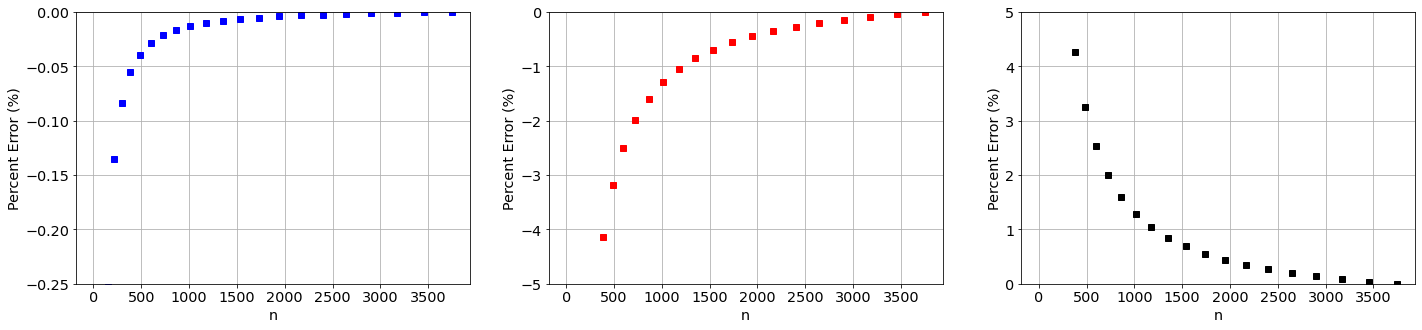

In [107]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(ellipsoid_radiation_data):
    r=ellipsoid_radiation_data[idx]['RCS'].loc[ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(ellipsoid_radiation_metadata[idx][0]['Elements'])

fig, axs = plt.subplots(1, 3, figsize=[24,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].plot(n, (np.array(max_r)-max_r[-1])/max_r[-1]*100, 'bs')
axs[0].grid(True)
axs[0].set_ylim([-.25,0])
#axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'Percent Error (%)' )
axs[0].set(xlabel='n')

axs[1].plot(n, (np.array(min_r)-min_r[-1])/min_r[-1]*100, 'rs')
axs[1].grid(True)
axs[1].set_ylim([-5,0])
#axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'Percent Error (%)')
axs[1].set(xlabel='n')

axs[2].plot(n, (np.array(max_min_r)-max_min_r [-1])/max_min_r[-1]*100, 'ks' )
axs[2].grid(True)
axs[2].set_ylim([0, 5])
#axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'Percent Error (%)')
axs[2].set(xlabel='n')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#from matplotlib.ticker import FormatStrFormatter

#for i in axs:
#    i.set_xticks([0.5, 1,10, 100])
#    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure5.svg', format='svg', dpi=1200)



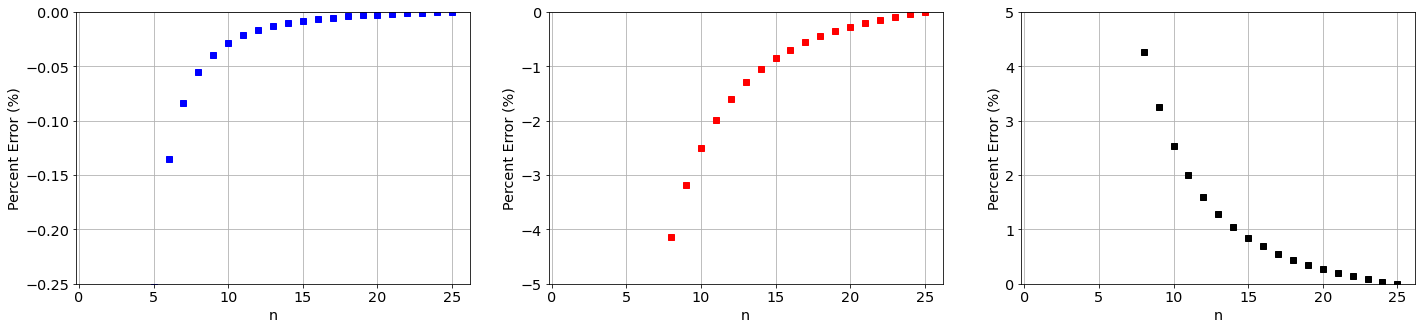

In [108]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(ellipsoid_radiation_data):
    r=ellipsoid_radiation_data[idx]['RCS'].loc[ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(ellipsoid_radiation_metadata[idx][0]['Number of Plates'])

fig, axs = plt.subplots(1, 3, figsize=[24,5], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].plot(n, (np.array(max_r)-max_r[-1])/max_r[-1]*100, 'bs')
axs[0].grid(True)
axs[0].set_ylim([-.25,0])
#axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'Percent Error (%)' )
axs[0].set(xlabel='n')

axs[1].plot(n, (np.array(min_r)-min_r[-1])/min_r[-1]*100, 'rs')
axs[1].grid(True)
axs[1].set_ylim([-5,0])
#axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'Percent Error (%)')
axs[1].set(xlabel='n')

axs[2].plot(n, (np.array(max_min_r)-max_min_r [-1])/max_min_r[-1]*100, 'ks' )
axs[2].grid(True)
axs[2].set_ylim([0, 5])
#axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'Percent Error (%)')
axs[2].set(xlabel='n')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#from matplotlib.ticker import FormatStrFormatter

#for i in axs:
#    i.set_xticks([0.5, 1,10, 100])
#    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure5.svg', format='svg', dpi=1200)



### Shell Test

In [14]:
data_dir='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Moth_Full_Sep19/WIPL/Roman/Ellipsoids/Shell_Tests/'
ellipsoid_files=glob(data_dir+'Ellipsoid*.ra1')
ellipsoid_files.sort()


ellipsoid_radiation_data=[]
ellipsoid_radiation_metadata=[]
for f in ellipsoid_files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ellipsoid_ra1_df, ellipsoid_ra1_dict)= wipl_radiation_output_reader_ellipsoid(f)
    ellipsoid_radiation_data.append(ellipsoid_ra1_df)
    ellipsoid_radiation_metadata.append(ellipsoid_ra1_dict)  


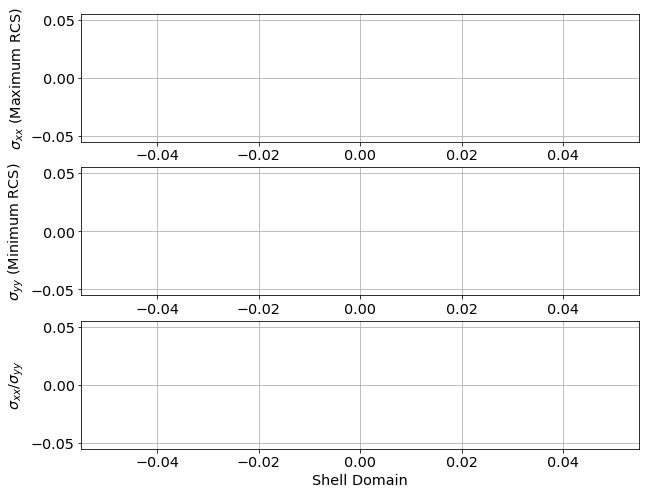

In [15]:
max_r=[]
min_r=[]
max_min_r=[]
n=[]

for idx, val in enumerate(ellipsoid_radiation_data):
    r=ellipsoid_radiation_data[idx]['RCS'].loc[ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    max_r.append(max(r))
    min_r.append(min(r))
    max_min_r.append(max(r)/min(r))
    n.append(ellipsoid_radiation_metadata[idx][0]['ShellDomain'])

fig, axs = plt.subplots(3, 1, figsize=[10,8], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.yscale('linear')

axs[0].plot(n, max_r, 'bs')
axs[0].grid(True)
#axs[0].set_ylim([2.5,2.8])
#axs[0].set_xlim([0,100])
axs[0].set(ylabel=r'$\sigma_{xx}$'+' (Maximum RCS)' )
#axs[0].set(xlabel='n')

axs[1].plot(n, min_r, 'rs')
axs[1].grid(True)
#axs[1].set_ylim([0.16, 0.24])
#axs[1].set_xlim([0,100])
axs[1].set(ylabel=r'$\sigma_{yy}$'+' (Minimum RCS)')
#axs[1].set(xlabel='n')

axs[2].plot(n, max_min_r, 'ks' )
axs[2].grid(True)
#axs[2].set_ylim([11.5, 15])
#axs[2].set_xlim([0,100])
axs[2].set(ylabel=r'$\sigma_{xx}/\sigma_{yy}$')
axs[2].set(xlabel='Shell Domain')


#plt.suptitle('Moth Based Ellipsoid Plate Number versus Min and Max RCS Comparison ($cm^2$)', y=.95,fontsize ='x-large')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#from matplotlib.ticker import FormatStrFormatter

#for i in axs:
#    i.set_xticks([0.5, 1,10, 100])
#    i.get_xaxis().set_major_formatter(FormatStrFormatter('%.1f'))

#fig.legend(lines[-4:], labels[-4:], 'center right',ncol=1, borderaxespad=.1)


plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure5.svg', format='svg', dpi=1200)

